In [39]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
#read file containing crypto data
#parse date data as date format
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

df_main = pd.read_csv(r"/kaggle/input/all-crypto-currencies/crypto-markets.csv", parse_dates = [3], date_parser = dateparse)
df_main.head(5)

/tmp/ipykernel_34/941714924.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_main = pd.read_csv(r"/kaggle/input/all-crypto-currencies/crypto-markets.csv", parse_dates = [3], date_parser = dateparse)


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [20]:
#check if date's dtype
df_main["date"].dtype

dtype('<M8[ns]')

In [21]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   slug         942297 non-null  object        
 1   symbol       942297 non-null  object        
 2   name         942297 non-null  object        
 3   date         942297 non-null  datetime64[ns]
 4   ranknow      942297 non-null  int64         
 5   open         942297 non-null  float64       
 6   high         942297 non-null  float64       
 7   low          942297 non-null  float64       
 8   close        942297 non-null  float64       
 9   volume       942297 non-null  float64       
 10  market       942297 non-null  float64       
 11  close_ratio  942297 non-null  float64       
 12  spread       942297 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 93.5+ MB


In [22]:
#check list of crypto and then pick first 15 for analysis
list_of_crypto = df_main['name'].unique().tolist()
df_list = list_of_crypto[:15]
df_list

['Bitcoin',
 'XRP',
 'Ethereum',
 'Stellar',
 'Bitcoin Cash',
 'EOS',
 'Litecoin',
 'Tether',
 'Bitcoin SV',
 'Cardano',
 'Monero',
 'TRON',
 'IOTA',
 'Dash',
 'NEM']

In [23]:
#extract df with only the 15 name
df = df_main[df_main['name'].isin(df_list)]
df['name'].unique()

array(['Bitcoin', 'XRP', 'Ethereum', 'Stellar', 'Bitcoin Cash', 'EOS',
       'Litecoin', 'Tether', 'Bitcoin SV', 'Cardano', 'Monero', 'TRON',
       'IOTA', 'Dash', 'NEM'], dtype=object)

In [24]:
#create year-month feature and year feature
df['month-year'] = df["date"].dt.strftime('%m/%Y')
df['year'] = df['date'].dt.year
df.head(5)

/tmp/ipykernel_34/2001337402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month-year'] = df["date"].dt.strftime('%m/%Y')
/tmp/ipykernel_34/2001337402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,month-year,year
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88,04/2013,2013
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49,04/2013,2013
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88,04/2013,2013
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17,05/2013,2013
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32,05/2013,2013


In [25]:
#remove incomplete month data to ensure consistant monthly data
df2 = df[df["date"] > "2013-12-31"]
df2.head(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,month-year,year
248,bitcoin,BTC,Bitcoin,2014-01-01,1,754.97,775.35,754.97,771.40,22489400.0,9.403308e+09,0.8062,20.38,01/2014,2014
249,bitcoin,BTC,Bitcoin,2014-01-02,1,773.44,820.31,767.21,802.39,38489500.0,9.781074e+09,0.6625,53.10,01/2014,2014
250,bitcoin,BTC,Bitcoin,2014-01-03,1,802.85,834.15,789.12,818.72,37810100.0,9.980135e+09,0.6573,45.03,01/2014,2014
251,bitcoin,BTC,Bitcoin,2014-01-04,1,823.27,859.51,801.67,859.51,38005000.0,1.047736e+10,1.0000,57.84,01/2014,2014
252,bitcoin,BTC,Bitcoin,2014-01-05,1,858.55,952.40,854.52,933.53,72898496.0,1.137966e+10,0.8072,97.88,01/2014,2014


In [26]:
#group data by month and name to get mean opening price
mean_open = df2.groupby(['year' ,'name'])['open'].mean()

In [27]:
mean_open.dtype

dtype('float64')

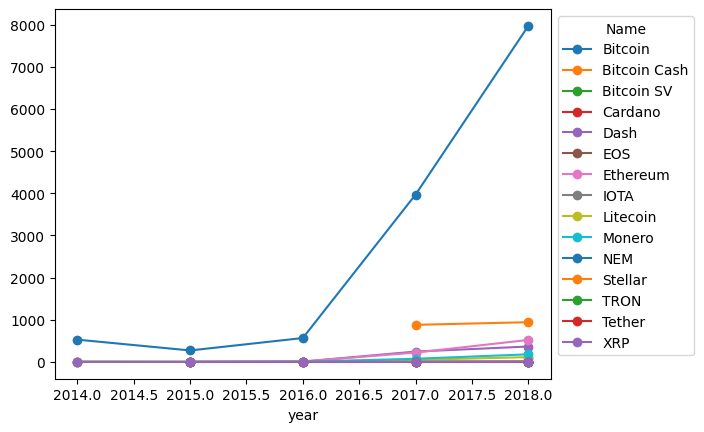

In [28]:
#plot the graph
mean_open.unstack().plot(kind='line', marker='o')
#move legend to the side
plt.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')

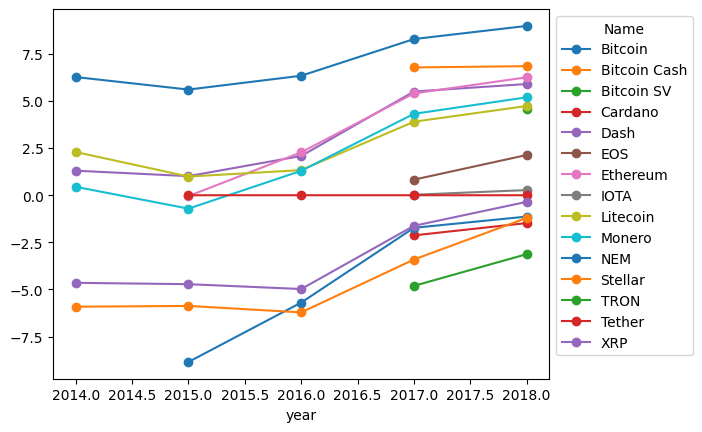

In [29]:
#plot log graph for clearer analysis
mean_open_log = mean_open.apply(np.log)
#set interval of y to 1
#.unstack() is used to separate the groups within year and name
mean_open_log.unstack().plot(kind='line', marker='o')
plt.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')

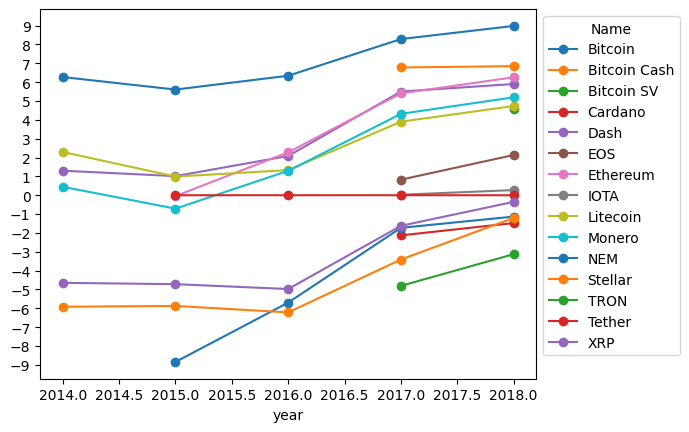

In [30]:
#set interval of y to 1
mean_open_log.unstack().plot(kind='line', marker='o')
plt.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

In [31]:
#group data based on month-year
mean_open = df2.groupby(['month-year' ,'name'])['open'].mean().unstack()
mean_open.head(5)

name,Bitcoin,Bitcoin Cash,Bitcoin SV,Cardano,Dash,EOS,Ethereum,IOTA,Litecoin,Monero,NEM,Stellar,TRON,Tether,XRP
month-year,,,,,,,,,,,,,,,
01/2014,841.702258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.214516,NaN,NaN,NaN,NaN,NaN,0.022312
01/2015,251.800000,NaN,NaN,NaN,1.612903,NaN,NaN,NaN,1.818065,0.343044,NaN,0.004891,NaN,NaN,0.018039
01/2016,412.805806,NaN,NaN,NaN,3.840645,NaN,1.449471,NaN,3.312581,0.518655,0.000316,0.001777,NaN,0.999999,0.005746
01/2017,914.681290,NaN,NaN,NaN,13.632903,NaN,10.117097,NaN,4.049032,12.926774,0.003857,0.002384,NaN,1.000000,0.006538
01/2018,13212.074194,2154.392258,NaN,0.755435,959.818065,12.200645,1093.100000,3.210968,218.462903,364.677742,1.243024,0.582762,0.097628,1.005927,1.915806


In [32]:
#convert index of date into datetime and then arrange them in ascending order
mean_open.index = pd.to_datetime(mean_open.index, format = '%m/%Y')
mean_open = mean_open.sort_index()
mean_open.head(15)

name,Bitcoin,Bitcoin Cash,Bitcoin SV,Cardano,Dash,EOS,Ethereum,IOTA,Litecoin,Monero,NEM,Stellar,TRON,Tether,XRP
month-year,,,,,,,,,,,,,,,
2014-01-01,841.702258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.214516,NaN,NaN,NaN,NaN,NaN,0.022312
2014-02-01,670.839286,NaN,NaN,NaN,0.775595,NaN,NaN,NaN,17.251429,NaN,NaN,NaN,NaN,NaN,0.017012
2014-03-01,595.781935,NaN,NaN,NaN,0.830212,NaN,NaN,NaN,15.712903,NaN,NaN,NaN,NaN,NaN,0.013642
2014-04-01,461.649000,NaN,NaN,NaN,0.834914,NaN,NaN,NaN,11.506000,NaN,NaN,NaN,NaN,NaN,0.006810
2014-05-01,480.990968,NaN,NaN,NaN,5.685484,NaN,NaN,NaN,10.682581,2.457273,NaN,NaN,NaN,NaN,0.005496
2014-06-01,615.222333,NaN,NaN,NaN,10.586667,NaN,NaN,NaN,10.262667,2.504138,NaN,NaN,NaN,NaN,0.004125
2014-07-01,619.773548,NaN,NaN,NaN,6.651290,NaN,NaN,NaN,8.061290,2.453871,NaN,NaN,NaN,NaN,0.004715
2014-08-01,539.687742,NaN,NaN,NaN,4.082903,NaN,NaN,NaN,5.930000,2.018065,NaN,0.002577,NaN,NaN,0.005141
2014-09-01,448.100667,NaN,NaN,NaN,2.985333,NaN,NaN,NaN,4.836667,1.696000,NaN,0.002879,NaN,NaN,0.004831


In [33]:
#create new df with percentage increase
df_percentage = ((mean_open - mean_open.shift(1))/mean_open.shift(1))*100
df_percentage.head(15)

name,Bitcoin,Bitcoin Cash,Bitcoin SV,Cardano,Dash,EOS,Ethereum,IOTA,Litecoin,Monero,NEM,Stellar,TRON,Tether,XRP
month-year,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,-20.299693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.755840,NaN,NaN,NaN,NaN,NaN,-23.757117
2014-03-01,-11.188574,NaN,NaN,NaN,7.041978,NaN,NaN,NaN,-8.918249,NaN,NaN,NaN,NaN,NaN,-19.808453
2014-04-01,-22.513763,NaN,NaN,NaN,0.566405,NaN,NaN,NaN,-26.773558,NaN,NaN,NaN,NaN,NaN,-50.080650
2014-05-01,4.189756,NaN,NaN,NaN,580.966217,NaN,NaN,NaN,-7.156435,NaN,NaN,NaN,NaN,NaN,-19.291048
2014-06-01,27.907253,NaN,NaN,NaN,86.205201,NaN,NaN,NaN,-3.930829,1.907204,NaN,NaN,NaN,NaN,-24.945466
2014-07-01,0.739768,NaN,NaN,NaN,-37.172950,NaN,NaN,NaN,-21.450335,-2.007356,NaN,NaN,NaN,NaN,14.296066
2014-08-01,-12.921785,NaN,NaN,NaN,-38.614870,NaN,NaN,NaN,-26.438575,-17.759958,NaN,NaN,NaN,NaN,9.038601
2014-09-01,-16.970383,NaN,NaN,NaN,-26.882094,NaN,NaN,NaN,-18.437324,-15.959079,NaN,11.691313,NaN,NaN,-6.030486


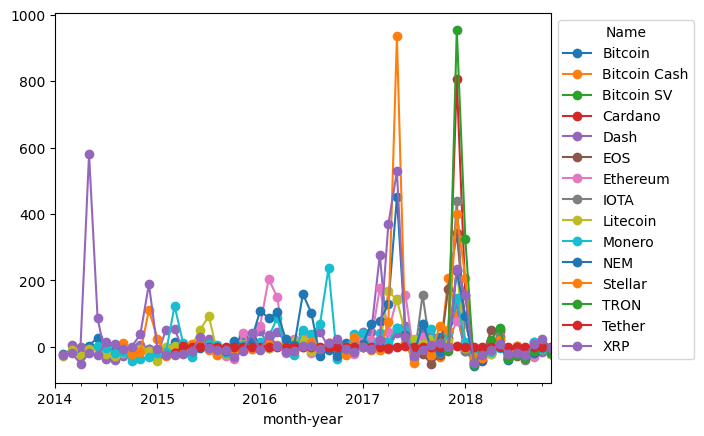

In [34]:
#plot the % increase graph
df_percentage.plot(kind='line', marker='o')
plt.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')

In [35]:
#combine data to get mean growth by month
#axis = 0 is when performing action by column, axis = 1 is action by row
df_percentage['mean growth'] = df_percentage.mean(axis = 1)
df_percentage.head(5)

name,Bitcoin,Bitcoin Cash,Bitcoin SV,Cardano,Dash,EOS,Ethereum,IOTA,Litecoin,Monero,NEM,Stellar,TRON,Tether,XRP,mean growth
month-year,,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,-20.299693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.755840,NaN,NaN,NaN,NaN,NaN,-23.757117,-24.270883
2014-03-01,-11.188574,NaN,NaN,NaN,7.041978,NaN,NaN,NaN,-8.918249,NaN,NaN,NaN,NaN,NaN,-19.808453,-8.218325
2014-04-01,-22.513763,NaN,NaN,NaN,0.566405,NaN,NaN,NaN,-26.773558,NaN,NaN,NaN,NaN,NaN,-50.080650,-24.700391
2014-05-01,4.189756,NaN,NaN,NaN,580.966217,NaN,NaN,NaN,-7.156435,NaN,NaN,NaN,NaN,NaN,-19.291048,139.677123


<Axes: xlabel='month-year'>

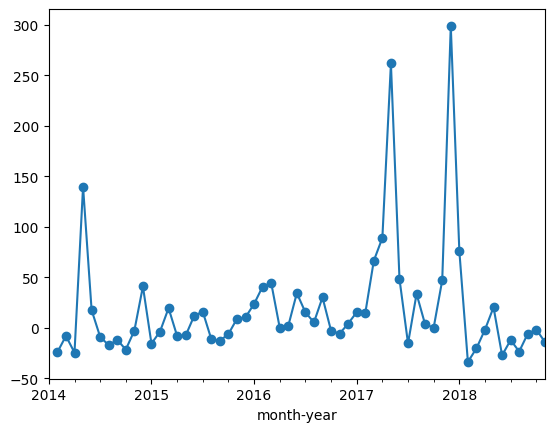

In [36]:
#plot mean growth
df_percentage['mean growth'].plot(kind='line', marker='o')

In [37]:
#difference for lag 1
df_percentage['mean growth l1'] = df_percentage['mean growth'].shift(1)
df_percentage['mean growth diff 1'] = df_percentage['mean growth'].diff(periods = 1)
df_percentage.head(5)

name,Bitcoin,Bitcoin Cash,Bitcoin SV,Cardano,Dash,EOS,Ethereum,IOTA,Litecoin,Monero,NEM,Stellar,TRON,Tether,XRP,mean growth,mean growth l1,mean growth diff 1
month-year,,,,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,-20.299693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.755840,NaN,NaN,NaN,NaN,NaN,-23.757117,-24.270883,NaN,NaN
2014-03-01,-11.188574,NaN,NaN,NaN,7.041978,NaN,NaN,NaN,-8.918249,NaN,NaN,NaN,NaN,NaN,-19.808453,-8.218325,-24.270883,16.052559
2014-04-01,-22.513763,NaN,NaN,NaN,0.566405,NaN,NaN,NaN,-26.773558,NaN,NaN,NaN,NaN,NaN,-50.080650,-24.700391,-8.218325,-16.482067
2014-05-01,4.189756,NaN,NaN,NaN,580.966217,NaN,NaN,NaN,-7.156435,NaN,NaN,NaN,NaN,NaN,-19.291048,139.677123,-24.700391,164.377514


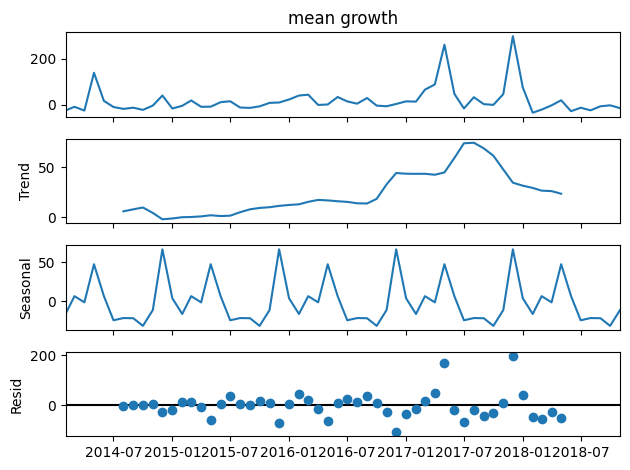

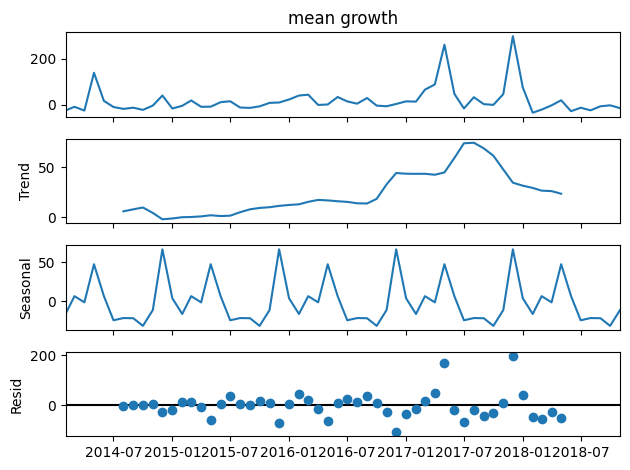

In [41]:
#decompose to check for seasonality, trend and noise
#can perform multiple decompose to analyse log functions
result_a = seasonal_decompose(df_percentage.iloc[1:, 15], model = 'additive')
result_a.plot()